<a href="https://colab.research.google.com/github/DuhanMahardikaA/Medical-Cost-Prediction/blob/main/Medical_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1 style="font-family: Trebuchet MS; padding: 5px; font-size: 48px; color: gold; text-align: center; line-height: 1;"><b>Medical Cost <span style="color: #000000"> Prediction


#**Table of Content**

1. [Context](#1)
2. [Import Libraries](#2)
3. [Exploratory Data Analysis (EDA)](#3)
    1. [Encoding](#6)
5. [Modeling](#10)
    1. [Linear Regression](#11)
6. [Prediction](#13)




<a id="1"></a>

---

# **Context**
Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost



---

## **Content**

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance


---
## **Target**
Can you accurately predict insurance costs?



# **Import Necessary Libraries**

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Understanding**

In [174]:
# Import dataset
path_Insurance = '/content/insurance.csv'

insurance = pd.read_csv('insurance.csv')


In [175]:
insurance.select_dtypes(include=['object']).describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [147]:
insurance.shape

(1338, 7)

In [176]:
cat=insurance.select_dtypes(include=['object']).columns.tolist()
for i in cat:
    obs=insurance[i].value_counts()
    avg_claim=insurance.groupby(i)["charges"].mean()
    display(pd.DataFrame({"Number of Policyholders":obs,"Average Claim Amount":avg_claim.map('${:,.2f}'.format)})\
            .sort_values('Number of Policyholders', ascending=False)\
            .style.set_caption("Variable:{}".format(i)))

,Number of Policyholders,Average Claim Amount
male,676,"$13,956.75"
female,662,"$12,569.58"


,Number of Policyholders,Average Claim Amount
no,1064,"$8,434.27"
yes,274,"$32,050.23"


,Number of Policyholders,Average Claim Amount
southeast,364,"$14,735.41"
northwest,325,"$12,417.58"
southwest,325,"$12,346.94"
northeast,324,"$13,406.38"


In [177]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [178]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


* Independent variables (x) are age, sex, bmi, children, smoker, region.
* Dependent variable (y) is Charger

In [179]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [180]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# **Exploratory Data Analysis (EDA)**


In [181]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##Encoding


In [197]:
#Encoding

from sklearn.preprocessing import LabelEncoder

df1 = insurance.copy()

label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['sex', 'smoker', 'region']

# Perform Label Encoding for each column
for column in columns_to_encode:
    df1[column] = label_encoder.fit_transform(df1[column])

df1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [198]:
#Correlation between data
df1.corr(method='pearson')

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [199]:
# Calculating Pearson correlation
correlation_matrix = df1.corr(method='pearson')

# Sorting correlation values in descending order
sorted_correlation = correlation_matrix['charges'].abs().sort_values(ascending=False)

# Displaying the results
strongest_correlations = sorted_correlation[1:]
print(strongest_correlations)


smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region      0.006208
Name: charges, dtype: float64


<Axes: >

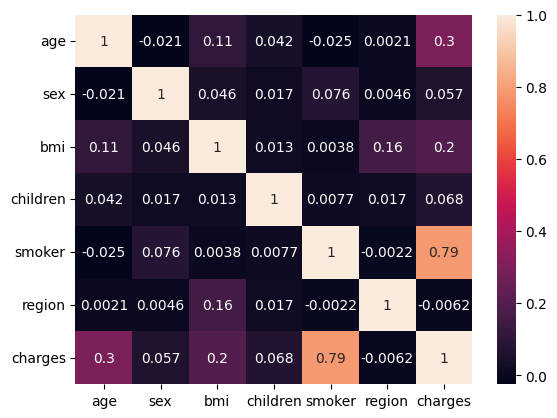

In [156]:
# Checking relationship between Features and Response

sns.heatmap(df1.corr(), annot=True)

We can see that 'region' is a variable whose lowest value is close to zero, meaning that region has almost no relationship with the costs incurred.

In [200]:
df1.drop('region', axis=1, inplace=True)


#Modeling

###Feature Selection using Adjusted R2 Squared
A statistical method for measuring the strength of the relationship between a model and a dependent variable. Range from 0 - 1, the greater the Adjuster R Squared score, the better the regression model fits the observations

In [201]:
import sklearn.model_selection as ms
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Feature Selection
X = df1.drop(columns=['charges'])

# Target Variable
y = df1['charges']

# Train-Test Split
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.1, random_state=0)

# Model Training
modell = LinearRegression()
modell.fit(X_train, y_train)


LinearRegression()

In [202]:
#check the shape of the training and testing data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1204, 5)
(1204,)
(134, 5)
(134,)


In [203]:
print('intercept=', modell.intercept_)
print('slope=', modell.coef_)

intercept= -11489.083876601959
slope= [  254.95994901   -48.63525203   307.26697502   456.07421177
 23482.69847884]


In [204]:
coef_dict = {
    'features': X.columns,
    'coef_values': modell.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_values'])
coef

,features,coef_values
0,age,254.959949
1,sex,-48.635252
2,bmi,307.266975
3,children,456.074212
4,smoker,23482.698479


In [205]:
#Measure performance using Adjusted R-squared

from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'r_squared: {r2_score(y_test, y_pred)}')

r_squared: 0.8223733995140988


Our model gets an accuracy score of **82%**

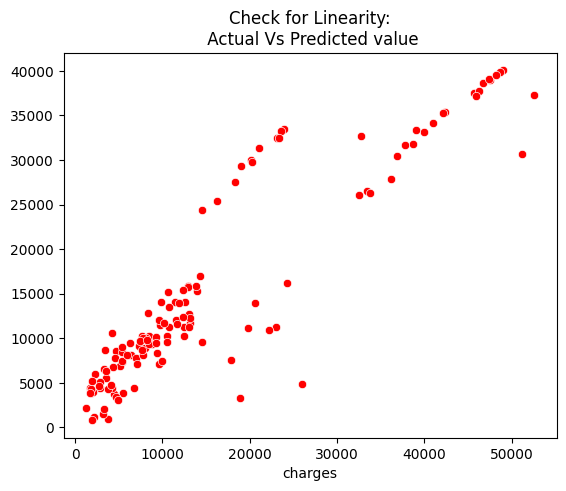

In [209]:
# Visualize linearity between actual and predicted values
f = plt.figure(figsize=(14, 5))

# Scatterplot
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')
plt.show()

In [206]:
df1

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


#Prediction


let's predict the car price according to the client's request with the following criteria:

1. age : 19
2. sex : 0
3. bmi : 27.900
4. children : 0
4. smoker: 1


In [212]:
# Convert the input features into a 2D array for prediction
input_features = [[19, 1, 26, 1, 1]]

# Make the prediction
predicted_charge = modell.predict(input_features)

# Display the predicted charge
print(f"The predicted charge for a 19-year-old female with BMI 27, no children, and a smoker is: ${predicted_charge[0]:,.2f}")

The predicted charge for a 19-year-old female with BMI 27, no children, and a smoker is: $25,234.23


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The predicted charge for a 19-year-old female with BMI 27, no children, and a smoker is: $25,134.06